<a href="https://colab.research.google.com/github/BimsaraS99/Predict-survival-on-the-Titanic-ml/blob/main/Titanic_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine - SVR**

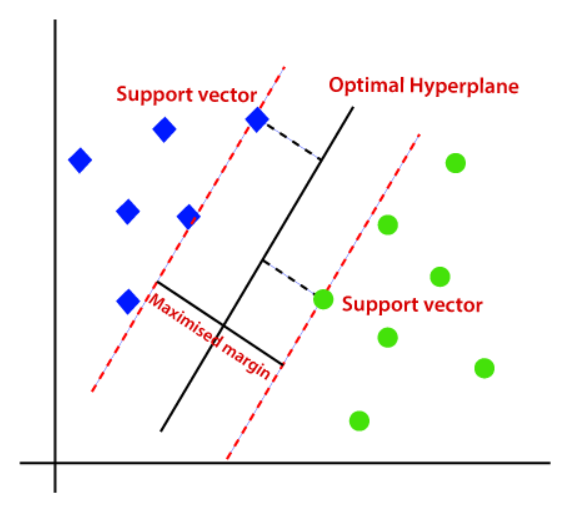

**Maximum Likelihood Estimation (MLE) is used to find the parameters that result in the best fitting curve or model. In the context of logistic regression, MLE is employed to estimate the coefficients of the model that maximize the likelihood of observing the given set of outcomes (0s and 1s) for a given set of predictor variables.**

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [52]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Classification/Section 14 - Logistic Regression/Python/Titanic_datasets/train.csv')

In [53]:
dataset.shape

(891, 12)

In [54]:
dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S


In [55]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Dataset Preprocessing

In [56]:
null_counts = dataset.isnull().sum()
total_rows = len(dataset)

null_percentage = (null_counts / total_rows) * 100

print("Percentage of Null Values in Each Column:")
print(null_percentage)
print("Null Values in Each Column:")
print(null_counts)

Percentage of Null Values in Each Column:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
Null Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


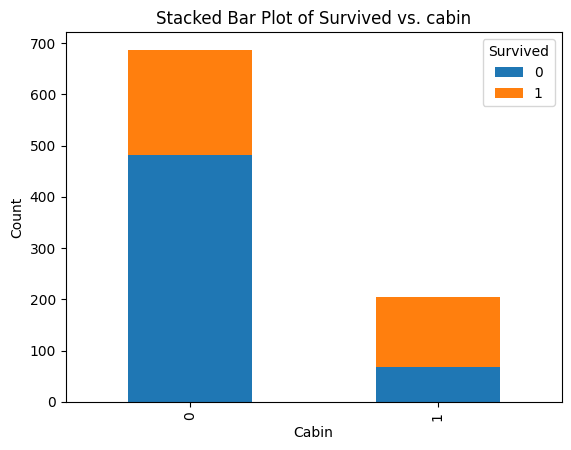

In [57]:
result_cabin = dataset['Cabin'].notnull().astype(int)

contingency_table = pd.crosstab(result_cabin, dataset['Survived'])
contingency_table.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

plt.title('Stacked Bar Plot of Survived vs. cabin')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.show()

It seems to be a relationship between the null values and number of people who were not survied. So that it is better to not to remove the entire column from the dataset. We can represent null values with 0 and so on.

In [58]:
dataset['Name'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# remove all the name from the colomn and keep the posistion of the each person

In [59]:
dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
567,568,0,3,Mrs,female,29.0,0,4,349909,21.0750,NaN,S
708,709,1,1,Miss,female,22.0,0,0,113781,151.5500,NaN,S
64,65,0,1,Mr,male,NaN,0,0,PC 17605,27.7208,NaN,C
877,878,0,3,Mr,male,19.0,0,0,349212,7.8958,NaN,S
36,37,1,3,Mr,male,NaN,0,0,2677,7.2292,NaN,C


In [60]:
columns_to_remove = ['PassengerId', 'Ticket']
dataset = dataset.drop(columns_to_remove, axis=1)

In [61]:
dataset.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
525,0,3,Mr,male,40.5,0,0,7.75,NaN,Q
17,1,2,Mr,male,NaN,0,0,13.00,NaN,S
120,0,2,Mr,male,21.0,2,0,73.50,NaN,S
385,0,2,Mr,male,18.0,0,0,73.50,NaN,S
705,0,2,Mr,male,39.0,0,0,26.00,NaN,S


In [62]:
null_counts = dataset.isnull().sum()
total_rows = len(dataset)

null_percentage = (null_counts / total_rows) * 100

print("Percentage of Null Values in Each Column:")
print(null_percentage)
print("Null Values in Each Column:")
print(null_counts)

Percentage of Null Values in Each Column:
Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64
Null Values in Each Column:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [63]:
dataset['Cabin'] = dataset['Cabin'].notnull().astype(int)

In [64]:
null_counts = dataset.isnull().sum()
print(null_counts)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64


In [65]:
dataset.sample(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
625,0,1,Mr,male,61.0,0,0,32.3208,1,S
756,0,3,Mr,male,28.0,0,0,7.7958,0,S
854,0,2,Mrs,female,44.0,1,0,26.0000,0,S


In [66]:
dataset = dataset.dropna(subset=['Embarked'])
null_counts = dataset.isnull().sum()
print(null_counts)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64


In [67]:
dataset.shape # after removing the Null rows of Embark

(889, 10)

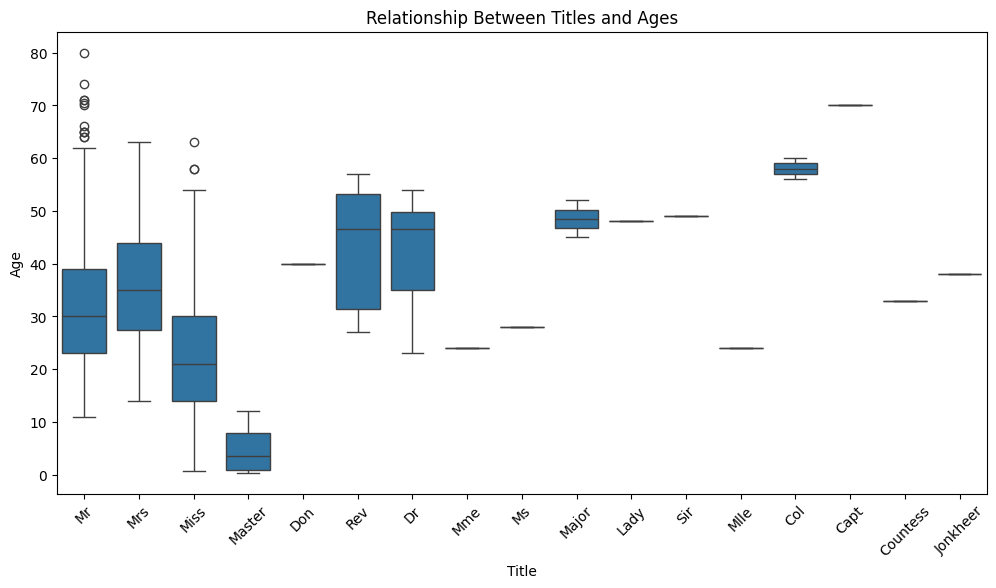

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Name', y='Age', data=dataset)

plt.title('Relationship Between Titles and Ages')
plt.xlabel('Title')
plt.ylabel('Age')

plt.xticks(rotation=45)
plt.show()

The idea is to replace the missing ages with the mean age corresponding to each title.

In [69]:
average_ages = dataset.groupby('Name')['Age'].mean()
print("Average Ages for Each Title:")
print(average_ages)

Average Ages for Each Title:
Name
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.662069
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.654206
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64


In [70]:
average_ages['Capt']

70.0

In [71]:
for index, row in dataset.iterrows():
    if pd.isnull(row['Age']):
        dataset.loc[index, 'Age'] = round(average_ages[row['Name']])

Replace the mssing ages with average values of the corresponding Name title.

In [72]:
dataset.loc[739] # a row with missing age

Survived         0
Pclass           3
Name            Mr
Sex           male
Age           32.0
SibSp            0
Parch            0
Fare        7.8958
Cabin            0
Embarked         S
Name: 739, dtype: object

In [73]:
dataset = dataset.dropna(subset=['Embarked'])
null_counts = dataset.isnull().sum()
print(null_counts) # No missing values in the dataset

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [74]:
for column in dataset:
  if dataset[column].dtypes == 'object':
    print(f'{column}: {dataset[column].unique()}')

Name: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q']


For sex, Embarked (Oridnal variables), better to use label encoding and for other two, we can use HotOneEncoding

In [75]:
dataset.shape

(889, 10)

In [76]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked'] = label_encoder.fit_transform(dataset['Embarked'])

In [77]:
dataset.shape

(889, 10)

In [78]:
dataset.sample(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
527,0,1,Mr,1,32.0,0,0,221.7792,1,2
236,0,2,Mr,1,44.0,1,0,26.0000,0,2
161,1,2,Mrs,0,40.0,0,0,15.7500,0,2


In [79]:
dataset = pd.get_dummies(dataset, columns=['Name'])

In [80]:
dataset.shape

(889, 26)

In [81]:
dataset.dtypes # ['Mr' 'Mrs' 'Miss-' 'Master-' 'Don-' 'Rev' 'Dr-' 'Mme' 'Ms' 'Major-' 'Lady-', 'Sir' 'Mlle-' 'Col-' 'Capt' 'Countess-' 'Jonkheer-']

Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Cabin              int64
Embarked           int64
Name_Capt          uint8
Name_Col           uint8
Name_Countess      uint8
Name_Don           uint8
Name_Dr            uint8
Name_Jonkheer      uint8
Name_Lady          uint8
Name_Major         uint8
Name_Master        uint8
Name_Miss          uint8
Name_Mlle          uint8
Name_Mme           uint8
Name_Mr            uint8
Name_Mrs           uint8
Name_Ms            uint8
Name_Rev           uint8
Name_Sir           uint8
dtype: object

In [82]:
dataset.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_Capt,...,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir
523,1,1,0,44.0,0,1,57.9792,1,0,0,...,0,0,0,0,0,0,1,0,0,0
54,0,1,1,65.0,0,1,61.9792,1,0,0,...,0,0,0,0,0,1,0,0,0,0
391,1,3,1,21.0,0,0,7.7958,0,2,0,...,0,0,0,0,0,1,0,0,0,0


In [83]:
for column in dataset.columns:
    if dataset[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        print(f"Column: {column}")
        print(f"   Min: {dataset[column].min()}")
        print(f"   Max: {dataset[column].max()}")

Column: Survived
   Min: 0
   Max: 1
Column: Pclass
   Min: 1
   Max: 3
Column: Sex
   Min: 0
   Max: 1
Column: Age
   Min: 0.42
   Max: 80.0
Column: SibSp
   Min: 0
   Max: 8
Column: Parch
   Min: 0
   Max: 6
Column: Fare
   Min: 0.0
   Max: 512.3292
Column: Cabin
   Min: 0
   Max: 1
Column: Embarked
   Min: 0
   Max: 2


## Feature Scaling

In [84]:
column_to_scale = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[column_to_scale] = scaler.fit_transform(dataset[column_to_scale])

In [85]:
for column in dataset.columns:
    if dataset[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        print(f"Column: {column}")
        print(f"   Min: {dataset[column].min()}")
        print(f"   Max: {dataset[column].max()}")

Column: Survived
   Min: 0
   Max: 1
Column: Pclass
   Min: -1.5722112109038908
   Max: 0.8252086287077022
Column: Sex
   Min: 0
   Max: 1
Column: Age
   Min: -2.2127370802547337
   Max: 3.8068327684863035
Column: SibSp
   Min: -0.4751990812099552
   Max: 6.77719548008876
Column: Parch
   Min: -0.4743258521037861
   Max: 6.967009721783257
Column: Fare
   Min: -0.6462044460638905
   Max: 9.668550782149426
Column: Cabin
   Min: 0
   Max: 1
Column: Embarked
   Min: -1.9395545325473502
   Max: 0.5868395765143266


## Splitting the dataset into the Training set and Test set

In [86]:
X = dataset.drop('Survived', axis='columns')
y = dataset['Survived']

In [87]:
X.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_Capt,Name_Col,...,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir
740,-1.572211,1,0.176029,-0.475199,-0.474326,-0.042213,1,0.586840,0,0,...,0,0,0,0,0,1,0,0,0,0
784,0.825209,1,-0.353463,-0.475199,-0.474326,-0.504266,0,0.586840,0,0,...,0,0,0,0,0,1,0,0,0,0
123,-0.373501,0,0.213850,-0.475199,-0.474326,-0.384475,1,0.586840,0,0,...,0,0,1,0,0,0,0,0,0,0
351,-1.572211,1,0.176029,-0.475199,-0.474326,0.058453,1,0.586840,0,0,...,0,0,0,0,0,1,0,0,0,0
255,0.825209,0,-0.050896,-0.475199,2.006119,-0.339260,0,-1.939555,0,0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
X.shape

(889, 25)

In [89]:
y.shape

(889,)

In [90]:
y.sample(3)

569    1
127    1
863    0
Name: Survived, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 22)

In [92]:
X_train.sample(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_Capt,Name_Col,...,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir
761,0.825209,1,0.856805,-0.475199,-0.474326,-0.502756,0,0.58684,0,0,...,0,0,0,0,0,1,0,0,0,0
170,-1.572211,1,2.369640,-0.475199,-0.474326,0.028253,1,0.58684,0,0,...,0,0,0,0,0,1,0,0,0,0
588,0.825209,1,-0.580388,-0.475199,-0.474326,-0.484133,0,0.58684,0,0,...,0,0,0,0,0,1,0,0,0,0


In [93]:
X_train.shape

(844, 25)

In [94]:
y_train.shape

(844,)

In [95]:
X_test.shape

(45, 25)

In [96]:
y_test.shape

(45,)

## Training the Support Vector Machine model on the Training set

In [97]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

## Predicting the Test set results

In [98]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

SVM algorithm might not suitable for this problem, we can do multiplt training processes with different types of algorithms and find the most suitable algorithm for this problem

# **Predicting Test Dataset**